# Part II - States and Occupation subgroups with high loan demand.

## by Jennifer Orji



## Investigation Overview


> Are you an advertisement agency or do you offer financial services and you want to understand the trend to determine what month of the year has high influx of loan seekers and how they vary by location and occupation?. Join me as we use visualization to answer these questions. The main features of interest are; Loan Origination Month, BorrowerState and Occupation. additional features used include; Loan Original Amount, Stated Monthly Income and Prosper Score among others.

## Dataset Overview

> The dataset contains almost 140,000 rows and 81 columns. A subset of rhe dataset was created and cleaned of inconsistencies and missing values.

In [1]:
!pip install seaborn==0.11.0

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_c = pd.read_csv("LoanData.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Original Amount among the states.

>There are spikes in loan amount in states like New Hampshire, Washington DC,Alaska, Maryland, Massachusetts e.t.c.This means that compared to other states, these aforementioned states have high financial demands.

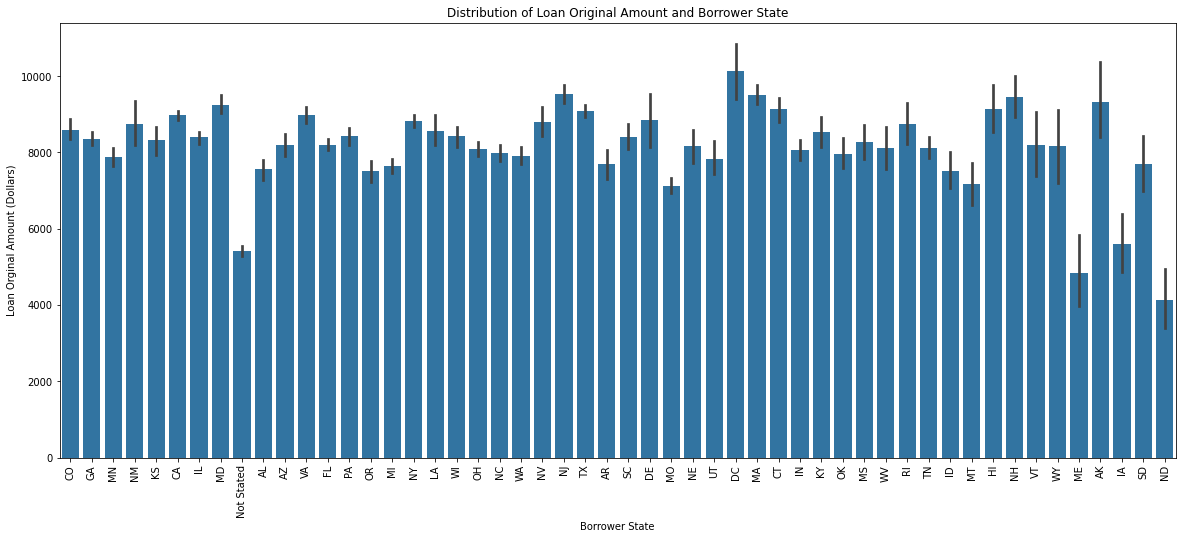

In [4]:
plt.figure(figsize=(20,8))
color=sb.color_palette()[0]
sb.barplot(data=loan_c, x="BorrowerState", y="LoanOriginalAmount", color=color)
plt.xticks(rotation=90);
plt.title("Distribution of Loan Original Amount and Borrower State")
plt.ylabel("Loan Orginal Amount (Dollars)")
plt.xlabel("Borrower State")
plt.show()

## Distribution of Loan Original Amount among the Occupation Subgroups.

> There are spikes in  loan amount in occupations pharmacy, judge, principal, pilot, executive e.t.c showing high demand.

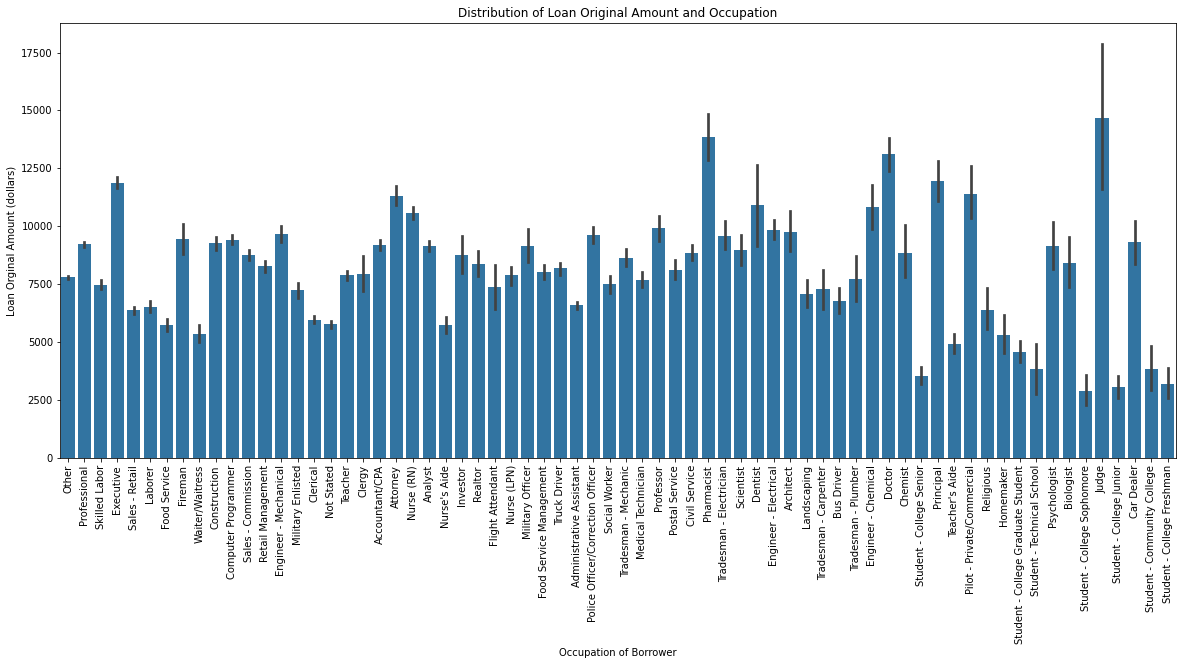

In [5]:
# Code
plt.figure(figsize=(20,8))
color=sb.color_palette()[0]
sb.barplot(data=loan_c, x="Occupation", y="LoanOriginalAmount", color=color)
plt.xticks(rotation=90);
plt.title("Distribution of Loan Original Amount and Occupation")
plt.ylabel("Loan Orginal Amount (dollars)")
plt.xlabel("Occupation of Borrower")
plt.show()

## How Loan Amount vary across states in December, October and January; then February, November and August.

> Across all states, most common loan amounts range from five thousand dollars to twenty five thousand dollars in December, November, October and August in descending order.

In [6]:
# code
loan1=loan_c["Occupation"].isin(["Pharmacist", "Judge", "Principal", "Pilot - Private / Commercial", "Psychologist", "Biologist", "Car Dealer", "Engineer - Chemical", "Engineer - Mechanical", "Police Officer / Correctional Officer", "Doctor", "Attorney", "Professor", "Social Worker", "Military Officer", "Nurse (RN)", "Analyst", "Accountant / CPA", "Construction", "Fireman", "Executive", "Professional", "Computer Programmer"])
loan2= loan_c["BorrowerState"].isin(["SD", "AK", "HI", "VT", "CO", "GA", "MN", "LS", "CA", "IL", "MD", "VA", "FL", "PA", "MI", "MY", "LA", "WI", "OH", "NV", "TX", "SC", "AR", "DE", "NJ", "UT", "DC", "MA"])
loan3= loan_c["LoanOriginationMonth"].isin(["January", "December", "October"])
loan4= loan_c["LoanOriginationMonth"].isin(["February", "November", "August"])
loan_v =loan_c[loan1 & loan2 & loan3]
loan_y =loan_c[loan1 & loan2 & loan4]
print(loan_v.shape)
print(loan_y.shape)

(7302, 22)
(6439, 22)


<Figure size 1440x720 with 0 Axes>

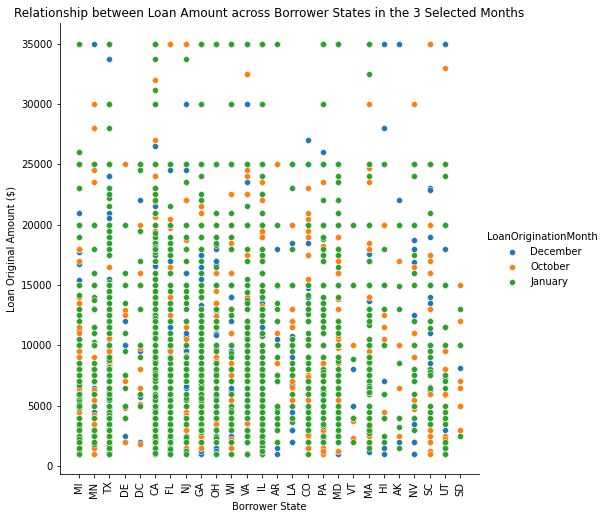

In [7]:
plt.figure(figsize=(20,10))
w=sb.FacetGrid(data=loan_v, hue="LoanOriginationMonth", size=7)
w.map(sb.scatterplot, "BorrowerState", "LoanOriginalAmount");
w.add_legend()
plt.xticks(rotation=90)
plt.xlabel("Borrower State")
plt.ylabel("Loan Original Amount ($)")
plt.title("Relationship between Loan Amount across Borrower States in the 3 Selected Months");
plt.show();

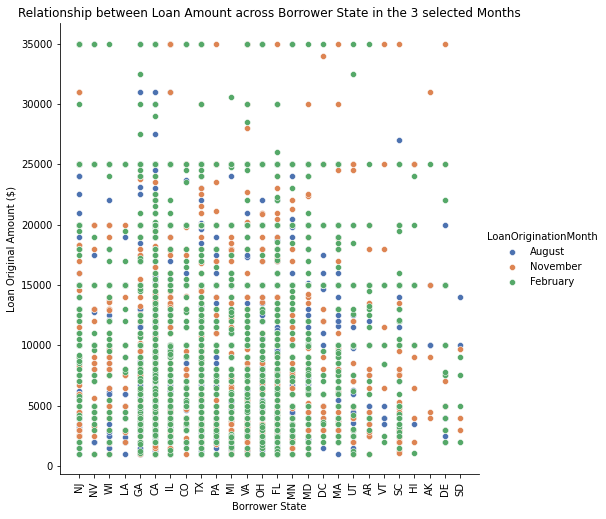

In [8]:
# code
with sb.color_palette("deep"):
    w=sb.FacetGrid(data=loan_y, hue="LoanOriginationMonth", size=7)
    w.map(sb.scatterplot, "BorrowerState", "LoanOriginalAmount");
    w.add_legend()
    plt.xticks(rotation=90);
    plt.xlabel("Borrower State")
    plt.ylabel("Loan Original Amount ($)")
    plt.title("Relationship between Loan Amount across Borrower State in the 3 selected Months");
    plt.show();

## How  Loan Amount vary across Occupations in December, October and January; then February, November and August.

> Occupations like Professionals, Psychologists, Professors, Doctors, Nurses, Analysts, Computer Programmers, Executives, Attorneys, Construction Workers, firemen and Mechanical Engineers took more loans in January and February compared to other months. Occupations like Principals,and Car Dealers took more in January and November. Chemical Engineers and Biologists took more in October and November. Social Workers took more loans in January, Judges took more loans in November and December and Pharmacists took more loans in November, December, January and August.

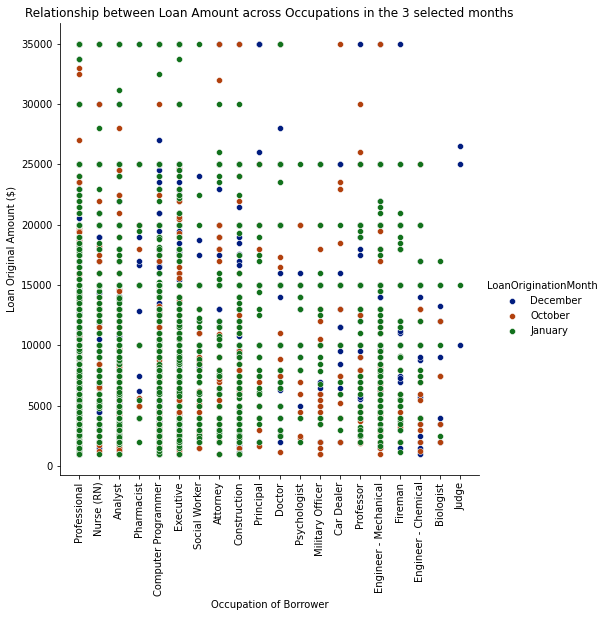

In [9]:
# code
with sb.color_palette("dark"):
    w=sb.FacetGrid(data=loan_v, hue="LoanOriginationMonth", size=7)
    w.map(sb.scatterplot, "Occupation", "LoanOriginalAmount");
    w.add_legend()
    plt.xticks(rotation=90);
    plt.title("Relationship between Loan Amount across Occupations in the 3 selected months")
    plt.xlabel("Occupation of Borrower")
    plt.ylabel("Loan Original Amount ($)")
    plt.show();


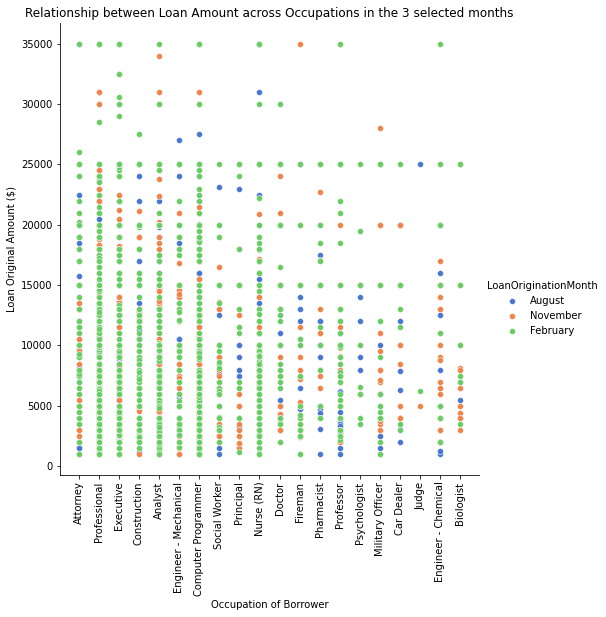

In [10]:
# code
with sb.color_palette("muted"):
    w=sb.FacetGrid(data=loan_y, hue="LoanOriginationMonth", size=7)
    w.map(sb.scatterplot, "Occupation", "LoanOriginalAmount");
    w.add_legend()
    plt.xticks(rotation=90)
    plt.xlabel("Occupation of Borrower")
    plt.ylabel("Loan Original Amount ($)")
    plt.title("Relationship between Loan Amount across Occupations in the 3 selected months")
    plt.show();

## (How does Loan Amount vary across Loan Origination Month and Loan Term¶)

> There is a positive relationship  between loan amount and loan term across the months. the higher the loan amount, the higher the loan term.

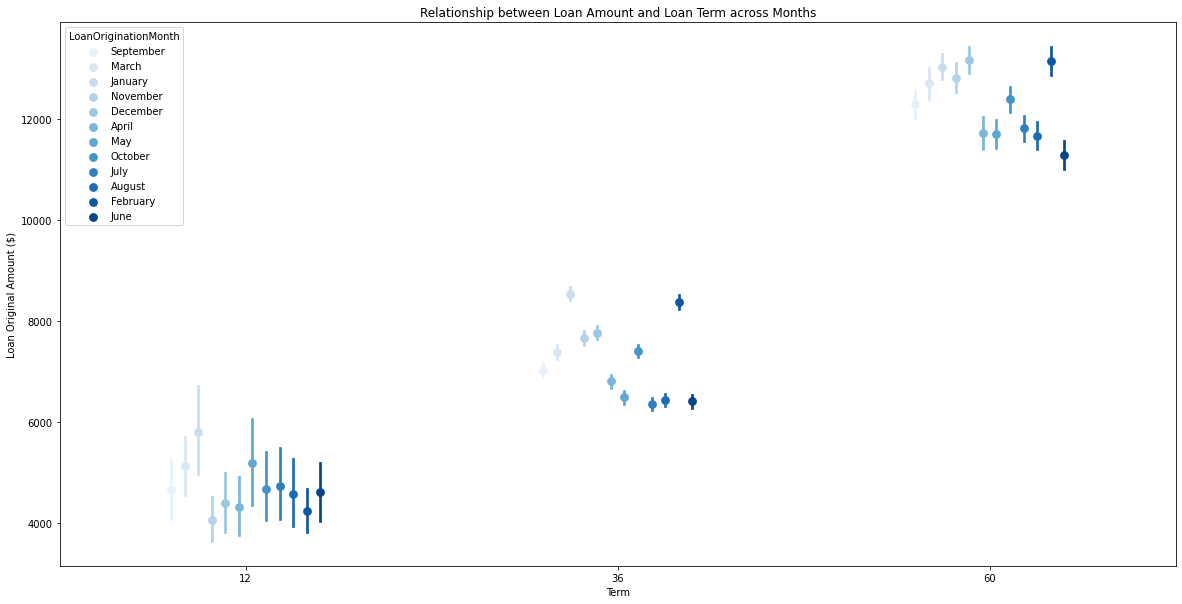

In [11]:
#Code
plt.figure(figsize=(20,10))
sb.pointplot(data=loan_c, x="Term", y="LoanOriginalAmount", hue="LoanOriginationMonth", palette="Blues", linestyles="", dodge=0.4)
plt.ylabel("Loan Original Amount ($)");
plt.title("Relationship between Loan Amount and Loan Term across Months")
plt.show();

#### With these information, we can make decisions as to when best in a year send targeted ads to certain states and professions to maximize sales and customer retention.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 856786 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 